## Devices

Each **Scene** is attached to a specific **Device**. The **Device** controls what hardware the ray tracing executes on. **Scene** implicitly creates a default **Device** when you do not specify one.

## The default device

The default device automatically selects **GPU ray tracing** if the *gpu module is compiled* and *there is at least one gpu present in the system* - otherwise it selects **CPU ray tracing**.

In [1]:
import fresnel
device = fresnel.Device()

## Query available execution modes

The ``available_modes`` static variable lists which execution modes are available. This will vary based on compile time options and whether there is a GPU present in the system.

In [2]:
print(fresnel.Device.available_modes)

['gpu', 'cpu', 'auto']


``available_gpus`` lists the GPUs available for rendering in the system.

In [3]:
for g in fresnel.Device.available_gpus:
    print(g)

 [0]:           Quadro GP100   56 SM_6.0 @ 1.44 GHz,  8276 MiB DRAM
 [1]:           Quadro GP100   56 SM_6.0 @ 1.44 GHz,  8276 MiB DRAM


## Choose execution hardware

Explicitly manage a **Device** to control what hardware the ray tracing executes on. Converting the device to a string provides a short summary of the device configuration.

In [4]:
gpu = fresnel.Device(mode='gpu')
print(gpu)

<fresnel.Device: Enabled OptiX devices:
 [0]:           Quadro GP100   56 SM_6.0 @ 1.44 GHz,  8276 MiB DRAM
 [1]:           Quadro GP100   56 SM_6.0 @ 1.44 GHz,  8276 MiB DRAM
>


In [5]:
cpu = fresnel.Device(mode='cpu')
print(cpu)

<fresnel.Device: All available CPU threads>


Set ``n`` to specify how many CPU threads or GPUs to use in parallel. By default, a device will use all available CPU cores or GPUs in the system.

In [6]:
cpu_limit = fresnel.Device(mode='cpu', n=6)
print(cpu_limit)

<fresnel.Device: 6 CPU threads>


## Attach a scene to a device

Each **Scene** must be attached to a device when created.

In [7]:
scene_gpu = fresnel.Scene(device=gpu)

In [8]:
scene_cpu = fresnel.Scene(device=cpu)

These two scenes have the same API, but different implementations.

In [9]:
for scene in [scene_cpu, scene_gpu]:
    geometry = fresnel.geometry.Sphere(scene, N=8, radius=1.0)
    geometry.position[:] = [[1,1,1],
                        [1,1,-1],
                        [1,-1,1],
                        [1,-1,-1],
                        [-1,1,1],
                        [-1,1,-1],
                        [-1,-1,1],
                        [-1,-1,-1]]
    geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,1]))

Rendered output is essentially identical from the two devices.

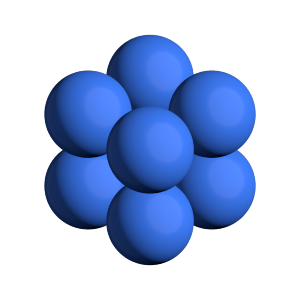

In [10]:
fresnel.preview(scene_gpu, w=300, h=300, aa_level=3)

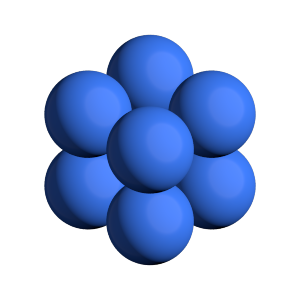

In [11]:
fresnel.preview(scene_cpu, w=300, h=300, aa_level=3)

## Memory consumption

Each **Device** consumes memory by itself. When maintaining multiple scenes, attach them all to the same device to reduce memory consumption.

In [12]:
import math
scene2_gpu = fresnel.Scene(device=gpu)
position = []
for k in range(5):
    for i in range(5):
        for j in range(5):
            position.append([2*i, 2*j, 2*k])
geometry = fresnel.geometry.Sphere(scene2_gpu, position = position, radius=1.0)
geometry.color[::4] = fresnel.color.linear([0.25,0.5,1])
geometry.color[1::4] = fresnel.color.linear([1,0.714,0.169])
geometry.color[2::4] = fresnel.color.linear([0.42,0.267,1])
geometry.color[3::4] = fresnel.color.linear([1,0.874,0.169])
geometry.material = fresnel.material.Material(solid=0.0, primitive_color_mix=1.0)

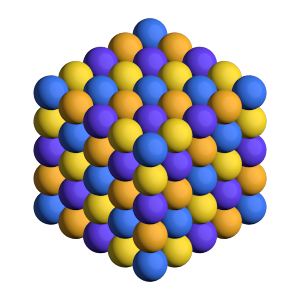

In [13]:
fresnel.preview(scene2_gpu, w=300, h=300, aa_level=3)